<a href="https://colab.research.google.com/github/debasisb/covid-19-Hawaii/blob/master/Covid_19_Hawaii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 Analysis - April 16, 2020

Source: The original code for the national data is from Noah Gift's book on Minimal Python. Github Source - https://github.com/debasisb/minimal-python/blob/master/Chapter7_data_science.ipynb


Import pandas and create a dataframe df for the US Covid-19 data from the NY Times GitHub content

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Display the columns of the data frame df. Shape is the dimensions of the data frame selected or the # rows and # of columns

In [2]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [3]:
df.shape

(2777, 5)

The Seaborn visualization package, is a plotting and graphical package that is used to display data on histograms, scatterplot etc.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


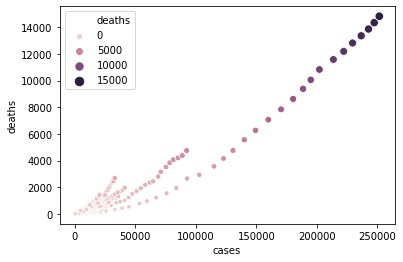

In [4]:
import seaborn as sns
sns.scatterplot (x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

Create an index of Dates from the source of the data till latest date

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2020-04-21', '2020-04-21', '2020-04-21', '2020-04-21',
               '2020-04-21', '2020-04-21', '2020-04-21', '2020-04-21',
               '2020-04-21', '2020-04-21'],
              dtype='datetime64[ns]', name='date', length=2777, freq=None)

Create the date for today, and the date two days ago (for the latest data for 2 days)

In [6]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2020-04-23
Two days ago 2020-04-21


Display the top 10 rows of data or head(10), bottom rows is tail()

In [7]:
df.loc[daybefore:today].tail(10)

,state,fips,cases,deaths
date,,,,
2020-04-21,Tennessee,47,7341,167
2020-04-21,Texas,48,20949,552
2020-04-21,Utah,49,3301,32
2020-04-21,Vermont,50,818,40
2020-04-21,Virgin Islands,78,54,3
2020-04-21,Virginia,51,9630,325
2020-04-21,Washington,53,12345,683
2020-04-21,West Virginia,54,929,26
2020-04-21,Wisconsin,55,4620,243


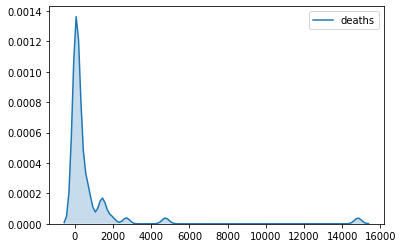

In [8]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

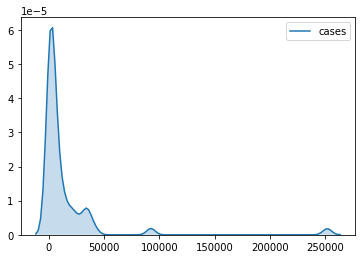

In [9]:
sns.kdeplot(df.loc[daybefore:today]["cases"], shade=True)

Create a data frame the identifies the top 10 states, sort by deaths and cases

In [10]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2020-04-21,New York,36,251720,14828
2020-04-21,New Jersey,34,92387,4753
2020-04-21,Michigan,26,32935,2698
2020-04-21,Massachusetts,25,41199,1961
2020-04-21,Pennsylvania,42,35384,1620
2020-04-21,Illinois,17,33059,1479
2020-04-21,Connecticut,9,20360,1423
2020-04-21,Louisiana,22,24854,1405
2020-04-21,California,6,35844,1316


In [12]:
current_df.shape

(56, 4)

In [13]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['New York',
 'New Jersey',
 'Michigan',
 'Massachusetts',
 'Pennsylvania',
 'Illinois',
 'Connecticut',
 'Louisiana',
 'California',
 'Florida']

In [0]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [15]:
set(top_states_df.state.values)

{'California',
 'Connecticut',
 'Florida',
 'Illinois',
 'Louisiana',
 'Massachusetts',
 'Michigan',
 'New Jersey',
 'New York',
 'Pennsylvania'}

Use Seaborn to create a basic line plot for the top 10 states

<Figure size 1080x360 with 0 Axes>

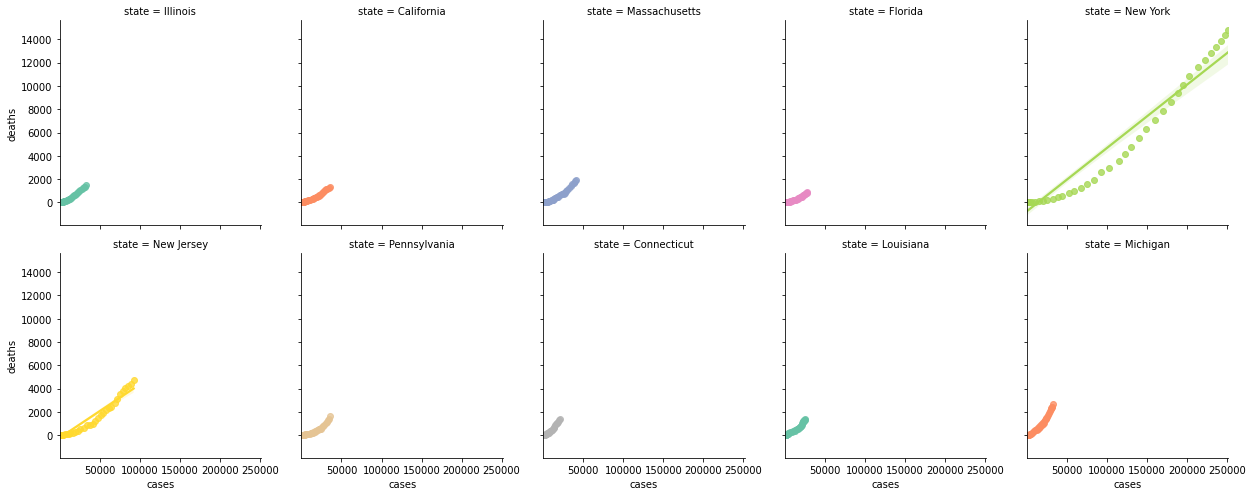

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [17]:
top_states_april_current_df = top_states_df.loc["2020-04-12":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_april_current_df.head(12)

,state,cases,deaths
date,,,
2020-04-21,New York,251720,14828
2020-04-20,New York,247543,14347
2020-04-19,New York,242817,13869
2020-04-18,New York,236763,13362
2020-04-17,New York,229642,12822
2020-04-16,New York,222284,12192
2020-04-15,New York,213779,11586
2020-04-14,New York,202208,10834
2020-04-13,New York,195031,10056


Use another popular graphical tool called Plotly. This shows a scatter plot for the month of April for the top 10 states

In [18]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_april_current_df, x=top_states_april_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

Original Code for ICS 360 HW - Import State Level Data for Hawaii from national dataset

In [19]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
Hawaii_df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
Hawaii_df.tail(15)

,date,cases,deaths
1951,2020-04-07,408,5
2006,2020-04-08,433,5
2062,2020-04-09,440,6
2118,2020-04-10,463,8
2174,2020-04-11,484,8
2230,2020-04-12,497,9
2286,2020-04-13,502,9
2342,2020-04-14,511,9
2398,2020-04-15,524,9
2454,2020-04-16,535,9


Import County Level Data for Hawaii from county dataset

In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df = df[df["state"] == "Hawaii"].drop(columns="fips").drop(columns="state")
df.tail(15)

,date,county,cases,deaths
67975,2020-04-18,Honolulu,382,6
67976,2020-04-18,Kauai,21,0
67977,2020-04-18,Maui,104,3
70736,2020-04-19,Hawaii,62,0
70737,2020-04-19,Honolulu,385,6
70738,2020-04-19,Kauai,21,0
70739,2020-04-19,Maui,106,4
73506,2020-04-20,Hawaii,64,0
73507,2020-04-20,Honolulu,385,6
73508,2020-04-20,Kauai,21,0


In [21]:
df.columns

Index(['date', 'county', 'cases', 'deaths'], dtype='object')

In [22]:
df.shape

(185, 4)

Create a data frame for Maui County and display data for past 15 days

In [23]:
Maui_County_df = df[df["county"]== "Maui"]
Maui_County_df.tail(15)

,date,county,cases,deaths
38688,2020-04-07,Maui,48,1
41230,2020-04-08,Maui,54,1
43796,2020-04-09,Maui,57,2
46395,2020-04-10,Maui,66,3
49026,2020-04-11,Maui,80,3
51687,2020-04-12,Maui,84,3
54368,2020-04-13,Maui,86,3
57061,2020-04-14,Maui,88,3
59768,2020-04-15,Maui,92,3
62492,2020-04-16,Maui,95,3


Visualization of Cases on Maui County over time

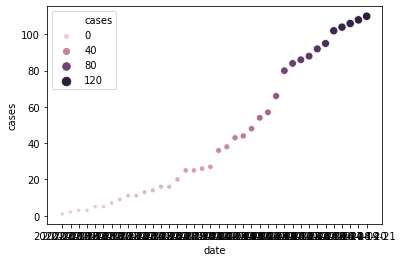

In [24]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Maui_County_df)

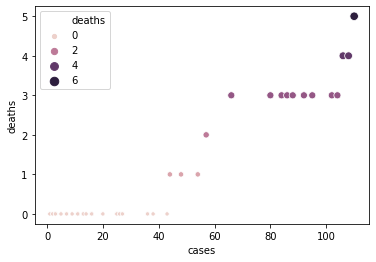

In [25]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Maui_County_df)

<Figure size 1080x360 with 0 Axes>

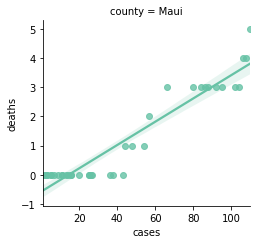

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Maui_County_df)
ax.fig.subplots_adjust(wspace=.2)

Create a data frame for Honolulu County and display data for past 15 days

In [27]:
Honolulu_County_df = df[df["county"]== "Honolulu"]
Honolulu_County_df.tail(15)

,date,county,cases,deaths
38686,2020-04-07,Honolulu,312,4
41228,2020-04-08,Honolulu,328,4
43794,2020-04-09,Honolulu,334,4
46393,2020-04-10,Honolulu,343,5
49024,2020-04-11,Honolulu,348,5
51685,2020-04-12,Honolulu,350,6
54366,2020-04-13,Honolulu,352,6
57059,2020-04-14,Honolulu,358,6
59766,2020-04-15,Honolulu,369,6
62490,2020-04-16,Honolulu,373,6


Visualization of Cases on Honolulu County over time

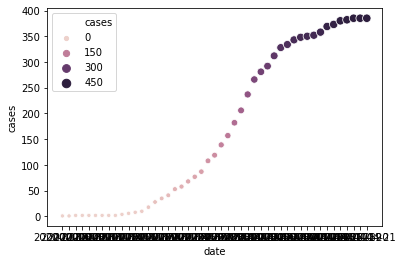

In [28]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Honolulu_County_df)

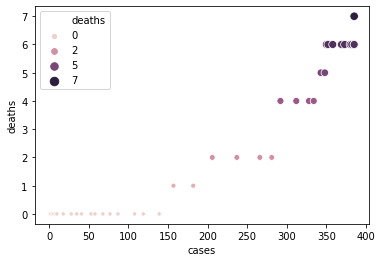

In [29]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=Honolulu_County_df)

<Figure size 1080x360 with 0 Axes>

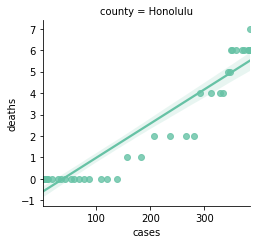

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="county",
                    col_wrap=5,
                    hue="county", 
                    palette="Set2",
                    data=Honolulu_County_df)
ax.fig.subplots_adjust(wspace=.2)

Analysis of Kauai County

In [31]:
Kauai_County_df = df[df["county"]== "Kauai"]
Kauai_County_df.tail()

,date,county,cases,deaths
65226,2020-04-17,Kauai,21,0
67976,2020-04-18,Kauai,21,0
70738,2020-04-19,Kauai,21,0
73508,2020-04-20,Kauai,21,0
76285,2020-04-21,Kauai,21,0


Visualization of cases at Kauai County over time

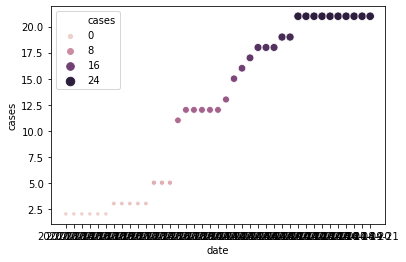

In [32]:
import seaborn as sns
sns.scatterplot(x="date", y="cases", 
                hue="cases",size="cases", data=Kauai_County_df)